# Loan Predictor

## 1) Introdução

In [1]:
import pandas as pd
import numpy as np

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df_train = pd.read_csv('data/train.csv')

## 2) Análise exploratória dos dados

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.shape

(614, 13)

In [5]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


---

## 3) Análise das variáveis

### 3.1) Gender

In [8]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df_train['Gender'].isnull().sum()

13

In [11]:
df_gender = df_train.groupby(['Gender', 'Loan_Status'], as_index=False)['Loan_ID'].count()
df_gender

,Gender,Loan_Status,Loan_ID
0,Female,N,37
1,Female,Y,75
2,Male,N,150
3,Male,Y,339


In [12]:
75/37, 339/150

(2.027027027027027, 2.26)

In [13]:
df_gender = df_train.groupby(['Gender', 'Education'], as_index=False)['Loan_ID'].count()
df_gender

,Gender,Education,Loan_ID
0,Female,Graduate,92
1,Female,Not Graduate,20
2,Male,Graduate,376
3,Male,Not Graduate,113


In [14]:
92/20, 376/113

(4.6, 3.327433628318584)

In [15]:
df_train.loc[(df_train['Gender'].isnull()) & (df_train['Education'] == 'Graduate'), 'Gender'] = 'Female'
df_train.loc[(df_train['Gender'].isnull()) & (df_train['Education'] == 'Not Graduate'), 'Gender'] = 'Male'

df_train['Gender'].isnull().sum()

0

In [16]:
del df_gender

### 3.2) Married

In [17]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
df_train['Married'].isnull().sum()

3

In [19]:
df_married = df_train.groupby(['Married', 'Loan_Status'], as_index=False)['Loan_ID'].count()
df_married

,Married,Loan_Status,Loan_ID
0,No,N,79
1,No,Y,134
2,Yes,N,113
3,Yes,Y,285


In [20]:
134/79, 285/113

(1.6962025316455696, 2.52212389380531)

In [21]:
df_train.loc[(df_train['Married'].isnull()) & (df_train['Loan_Status'] == 'Y'), 'Married'] = 'Yes'
df_train.loc[(df_train['Married'].isnull()) & (df_train['Loan_Status'] == 'N'), 'Married'] = 'No'

df_train['Married'].isnull().sum()

0

In [22]:
del df_married

### 3.3) Dependents

In [23]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
df_train['Dependents'].isnull().sum()

15

In [26]:
df_train['Dependents'].fillna(0, inplace=True)
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

In [27]:
# Converter valores string para float.
def converterStrToInt(x):
    x = str(x)
    x = x.replace('+', '')
    x = int(x)

    return x

df_train['Dependents'] = df_train['Dependents'].apply(converterStrToInt)

### 3.4) Education

In [28]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
df_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [30]:
df_train['Education'].isnull().sum()

0

### 3.5) Self_Employed

In [31]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [33]:
df_train['Self_Employed'].isnull().sum()

32

In [34]:
df_employed = df_train.groupby(['Self_Employed', 'Loan_Status'], as_index=False)['Loan_ID'].count()
df_employed

,Self_Employed,Loan_Status,Loan_ID
0,No,N,157
1,No,Y,343
2,Yes,N,26
3,Yes,Y,56


In [35]:
df_train['Self_Employed'].fillna('No', inplace=True)

In [36]:
del df_employed

### 3.6) CoapplicantIncome

In [37]:
df_train['CoapplicantIncome'].isnull().sum()

0

In [38]:
df_train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [39]:
px.box(df_train['CoapplicantIncome'])

In [40]:
df_train.loc[df_train['CoapplicantIncome'] > 6000, ['CoapplicantIncome', 'Loan_Status']].sort_values(by=['Loan_Status', 'CoapplicantIncome'])

,CoapplicantIncome,Loan_Status
513,6666.0,N
180,7250.0,N
135,7750.0,N
9,10968.0,N
177,11300.0,N
417,20000.0,N
581,33837.0,N
600,41667.0,N
349,6250.0,Y
506,6667.0,Y



### 3.7) LoanAmount

In [41]:
df_train['LoanAmount'].isnull().sum()

22

In [42]:
px.box(df_train['LoanAmount'])

In [43]:
df_train['LoanAmount'].fillna(df_train.groupby(['Loan_Status'])['LoanAmount'].transform('median'), inplace=True)

### 3.8) Loan_Amount_Term

In [44]:
df_train['Loan_Amount_Term'].isnull().sum()

14

In [45]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
px.box(df_train['Loan_Amount_Term'])

In [47]:
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median(), inplace=True)

### 3.9) Credit_History

In [48]:
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [49]:
df_train['Credit_History'].isnull().sum()

50

In [50]:
df_history = df_train.groupby(['Credit_History','Loan_Status'], as_index=False)['Loan_ID'].count()
df_history

,Credit_History,Loan_Status,Loan_ID
0,0.0,N,82
1,0.0,Y,7
2,1.0,N,97
3,1.0,Y,378


In [51]:
df_train.loc[(df_train['Credit_History'].isnull()) & (df_train['Loan_Status'] == 'N'), 'Credit_History'] = 0.0
df_train.loc[(df_train['Credit_History'].isnull()) & (df_train['Loan_Status'] == 'Y'), 'Credit_History'] = 1.0

In [52]:
df_train['Credit_History'].isnull().sum()

0

### 3.10) Property_Area

In [53]:
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [54]:
df_train['Property_Area'].isnull().sum()

0

### 3.11) Loan_Status

In [55]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [56]:
df_train['Loan_Status'].isnull().sum()

0

## 4) Pré Processamento dos Dados

In [57]:
df_processed = df_train.copy()

In [58]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, RobustScaler
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Bibliotecas para computação estatística
from scipy import stats

In [59]:
class MyHotEncoder:
    def __init__(self, df, cols):
        self.df = df
        self.list_oneHotEncoder = []
        self.list_col = []

        if isinstance(cols, list):
            self.list_col = cols
        else:
            self.list_col.append(cols)

    #Treina os dados passados.
    def fit_transform(self):

        self.df.reset_index(drop=True, inplace=True) #Reseta o index do dataset para não causar problemas
        X = self.df.values

        #Para cada coluna crie uma string contendo o nome do atributo e o nome da categoria.
        #Exemplo de saída: [sex_male]
        for col in self.list_col: 
            valores = list(self.df[col].sort_values().unique())
            colunas = []
            for i in valores:
                colunas.append(col + '_' + str(i))
            colunas = colunas + list(self.df.columns)
            
            #One hot encoder para treinar
            onehotencoder = OneHotEncoder(handle_unknown='ignore')
            self.list_oneHotEncoder.append(onehotencoder)

            enc_df = onehotencoder.fit_transform(self.df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)
            
            #União do dataset gerado ao dataset original
            self.df = enc_df.join(self.df)
            self.df.columns = colunas
            self.df.drop(col, axis=1, inplace=True)
        
        return self.df

    #Apenas aplica a transformação a novos dados.
    def transform(self, df):
        
        for i in range(len(self.list_col)):
            col = self.list_col[i]

            valores = list(df[col].sort_values().unique())
            colunas = []
            for j in valores:
                colunas.append(col + '_' + str(j))
            colunas = colunas + list(df.columns)

            #One hot encoder para transformar
            enc_df = self.list_oneHotEncoder[i].transform(df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)

            #União do dataset gerado ao dataset original
            df = enc_df.join(df)
            df.columns = colunas
            df.drop(col, axis=1, inplace=True)


        return df

In [60]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### 4.1) Mapeamento de atributos

#### 4.1.1) Gender

In [62]:
df_processed['Gender'].value_counts()

Male      490
Female    124
Name: Gender, dtype: int64

In [63]:
gender_map = {
    'Male': 1,
    'Female': 0
}

df_processed['Gender'] = df_processed['Gender'].map(gender_map)

#### 4.1.2) Married

In [64]:
df_processed['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [65]:
married_map = {
    'Yes': 1,
    'No': 0
}

df_processed['Married'] = df_processed['Married'].map(married_map)

#### 4.1.3) Education

In [66]:
df_processed['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [67]:
education_map = {
    'Graduate': 1,
    'Not Graduate': 0
}

df_processed['Education'] = df_processed['Education'].map(education_map)

#### 4.1.4) Self_Employed

In [68]:
df_processed['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [69]:
selfemployed_map = {
    'Yes': 1,
    'No': 0
}

df_processed['Self_Employed'] = df_processed['Self_Employed'].map(selfemployed_map)

#### 4.1.5) Property_Area

In [70]:
df_processed['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [71]:
#Aplicando a classe que foi definida MyHotEncoder para realizar o One Hot Encoding dos atributos.
my_encoder = MyHotEncoder(df_processed,['Property_Area'])
df_processed_encoded = my_encoder.fit_transform()

In [72]:
df_processed_encoded.head()

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,0.0,1.0,LP001002,1,0,0,1,0,5849,0.0,126.0,360.0,1.0,Y
1,1.0,0.0,0.0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N
2,0.0,0.0,1.0,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Y
3,0.0,0.0,1.0,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Y
4,0.0,0.0,1.0,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Y


#### 4.1.6) Loan_Status

In [73]:
df_processed_encoded['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [74]:
loanstatus_map = {
    'Y': 1,
    'N': 0
}

df_processed_encoded['Loan_Status'] = df_processed_encoded['Loan_Status'].map(loanstatus_map)

### 4.2) Correlação entre variáveis

In [75]:
df_processed_encoded.columns

Index(['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [76]:
df_corr = df_processed_encoded[['Loan_Status', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
                                'Gender', 'Married', 'Dependents', 'Education',
                                'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                                'Loan_Amount_Term', 'Credit_History', ]].corr()

<AxesSubplot:>

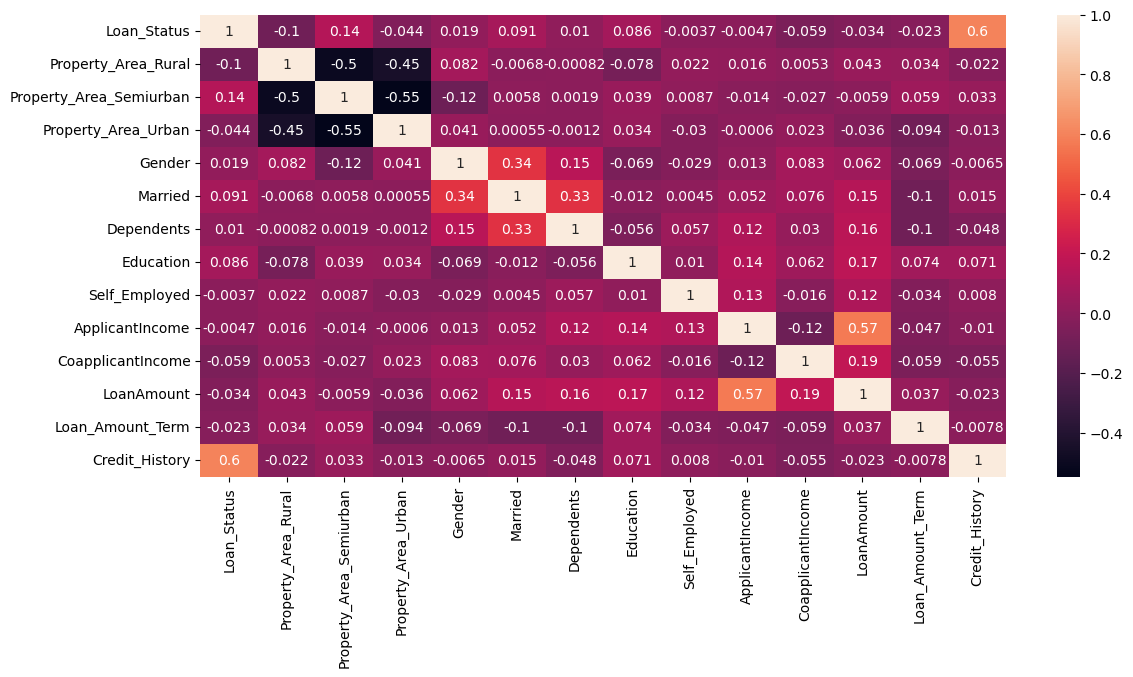

In [77]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_corr, annot=True)

### 4.3) Removendo atributos e Separando Features e Target

In [78]:
df_processed_encoded.drop(columns=['Loan_ID'], inplace=True)

In [79]:
X = df_processed_encoded.drop(columns=['Loan_Status']).values
Y = df_processed_encoded['Loan_Status']

### 4.4) Divisão entre treino e teste

In [80]:
#Separando os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### 4.5) Escala e Padronização

In [81]:
scaler = StandardScaler()

x_encoded_scaler = scaler.fit_transform(X_train)

In [82]:
X_test = scaler.transform(X_test)

## 5) Modelagem Base

### 5.1) Aplicação de algoritmos

#### 5.1.1) KNN

In [83]:
knn = KNeighborsClassifier()
knn.fit(x_encoded_scaler, Y_train)

preds = knn.predict(X_test)
f_score = f1_score(preds, Y_test)
ac_score = accuracy_score(preds, Y_test)

print('F1 score em Teste = {:.2f}%'.format(f_score * 100))
print('Acurácia em Teste = {:.2f}%'.format(ac_score * 100))

F1 score em Teste = 87.63%
Acurácia em Teste = 81.08%


/home/krupck/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



#### 5.1.2) Logistic Regression

In [84]:
logisticReg = LogisticRegression()
logisticReg.fit(x_encoded_scaler, Y_train)

preds = logisticReg.predict(X_test)
f_score = f1_score(preds, Y_test)
ac_score = accuracy_score(preds, Y_test)

print('F1 score em Teste = {:.2f}%'.format(f_score * 100))
print('Acurácia em Teste = {:.2f}%'.format(ac_score * 100))

F1 score em Teste = 90.41%
Acurácia em Teste = 84.86%


#### 5.1.3) Random Forest

In [85]:
randomForest = RandomForestClassifier()
randomForest.fit(x_encoded_scaler, Y_train)

preds = randomForest.predict(X_test)
f_score = f1_score(preds, Y_test)
ac_score = accuracy_score(preds, Y_test)

print('F1 score em Teste = {:.2f}%'.format(f_score * 100))
print('Acurácia em Teste = {:.2f}%'.format(ac_score * 100))

F1 score em Teste = 87.32%
Acurácia em Teste = 80.54%


#### 5.1.4) XGB Classifier

In [86]:
xgb = XGBClassifier()
xgb.fit(x_encoded_scaler, Y_train)

preds = xgb.predict(X_test)
f_score = f1_score(preds, Y_test)
ac_score = accuracy_score(preds, Y_test)

print('F1 score em Teste = {:.2f}%'.format(f_score * 100))
print('Acurácia em Teste = {:.2f}%'.format(ac_score * 100))

F1 score em Teste = 88.57%
Acurácia em Teste = 82.70%


### 5.2) Feature Selection

In [87]:
columns = ['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

,importance
Credit_History,0.300325
ApplicantIncome,0.185716
LoanAmount,0.179398
CoapplicantIncome,0.109430
Dependents,0.049989
Loan_Amount_Term,0.030313
Married,0.026762
Education,0.024416
Gender,0.020939
Self_Employed,0.019945


<AxesSubplot:xlabel='importance'>

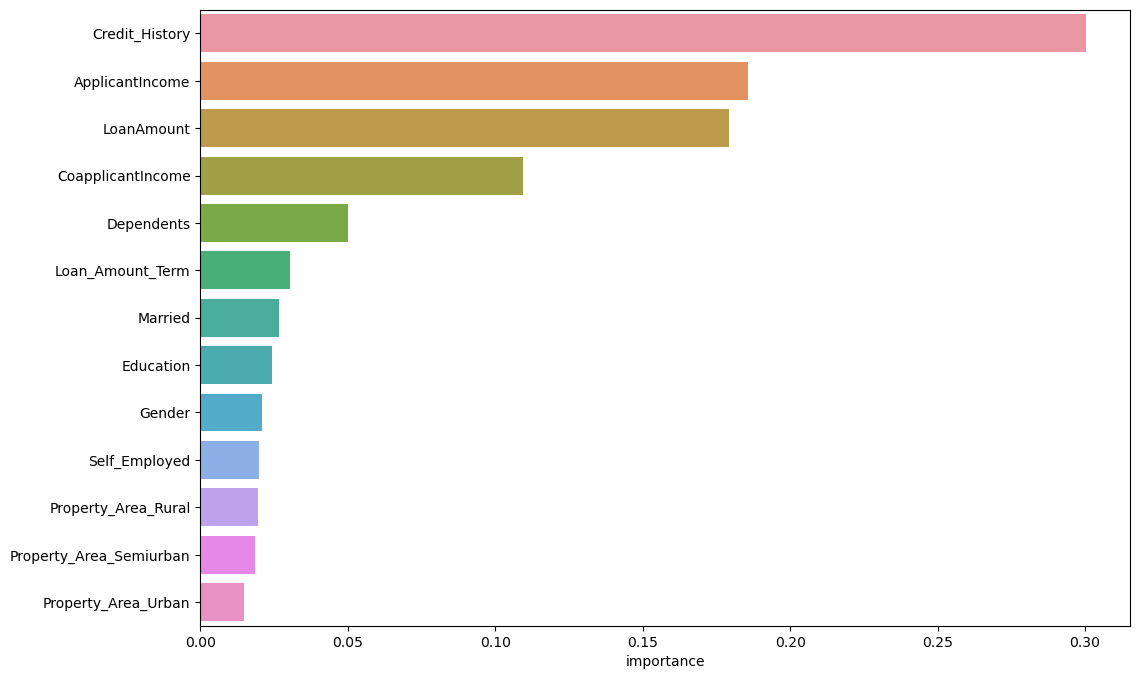

In [88]:
df_temp = pd.DataFrame(randomForest.feature_importances_, index=columns, columns=['importance']).sort_values(by='importance', ascending=False)

display(df_temp)
colunas_importantes = list(df_temp.loc[df_temp['importance'] > 0.1].index)


plt.figure(figsize=(12,8))
sns.barplot(x=df_temp['importance'], y=df_temp.index)

### 5.3) Modelagem Final

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import ensemble

In [123]:
cols = ['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Dependents', 'Loan_Status']
df_train[cols].head(15)

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents,Loan_Status
0,1.0,126.0,5849,0.0,0,Y
1,1.0,128.0,4583,1508.0,1,N
2,1.0,66.0,3000,0.0,0,Y
3,1.0,120.0,2583,2358.0,0,Y
4,1.0,141.0,6000,0.0,0,Y
5,1.0,267.0,5417,4196.0,2,Y
6,1.0,95.0,2333,1516.0,0,Y
7,0.0,158.0,3036,2504.0,3,N
8,1.0,168.0,4006,1526.0,2,Y
9,1.0,349.0,12841,10968.0,1,N


In [97]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
#columnsX=df_train.columns[1:-1]
#columnsY=df_train.columns[-1]


columnsX=['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Dependents']
columnsY='Loan_Status'

In [92]:
#catCol=['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
#numWithScalingCol=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#numerCol=['Credit_History']



catCol=['Dependents']
numWithScalingCol=['ApplicantIncome','CoapplicantIncome','LoanAmount']
numerCol=['Credit_History']

In [93]:
numeric_transformer_scaling = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=99))])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [94]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_scaling, numWithScalingCol),
        ('num2', numeric_transformer, numerCol),
        ('cat', categorical_transformer, catCol)])

In [95]:
preprocessor.fit(df_train[columnsX],df_train[columnsY])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount']),
                                ('num2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=99,
                                                                strategy='constant'))]),
                                 ['Credit_History']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Dependents'])])

In [98]:
modelPipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [99]:
modelPipeline.fit(df_train[columnsX],df_train[columnsY])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('num2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=99,
                                                                                 strategy='constant'))]),
                  

In [100]:
scores=modelPipeline.predict_proba(df_train[columnsX])[:,-1]

In [101]:
scores

array([0.99, 0.27, 0.87, 1.  , 0.99, 0.95, 0.98, 0.12, 0.83, 0.27, 0.98,
       0.99, 0.96, 0.4 , 0.89, 1.  , 0.99, 0.01, 0.22, 0.96, 0.02, 0.96,
       0.02, 0.06, 0.02, 0.95, 1.  , 0.95, 0.31, 1.  , 0.08, 0.21, 0.34,
       0.96, 0.24, 0.98, 0.01, 0.96, 0.89, 0.99, 0.23, 0.95, 0.8 , 0.97,
       0.84, 0.8 , 0.97, 1.  , 0.05, 0.98, 0.94, 0.93, 0.24, 0.35, 0.03,
       0.97, 0.96, 0.34, 0.97, 0.97, 0.95, 0.98, 0.  , 0.08, 0.03, 0.38,
       0.02, 0.88, 0.98, 0.07, 0.96, 0.97, 0.74, 0.06, 0.92, 0.31, 0.22,
       0.26, 0.09, 0.88, 0.97, 0.94, 0.22, 0.04, 0.84, 0.97, 0.98, 0.99,
       0.84, 0.89, 1.  , 0.91, 1.  , 1.  , 0.94, 0.06, 0.99, 0.93, 0.96,
       0.91, 0.97, 0.9 , 0.97, 0.9 , 0.86, 0.99, 0.96, 0.27, 0.08, 0.91,
       0.93, 1.  , 0.  , 0.93, 0.95, 0.9 , 0.99, 0.98, 0.26, 0.85, 0.87,
       0.97, 0.68, 0.95, 0.85, 0.89, 0.92, 0.99, 0.12, 0.02, 0.81, 0.89,
       0.94, 0.92, 0.95, 0.25, 0.24, 0.98, 0.01, 0.35, 0.29, 0.81, 0.93,
       0.99, 0.97, 0.95, 0.93, 0.91, 0.29, 0.96, 0.

## 6) Testando o modelo

In [102]:
data2=pd.read_csv('data/test.csv')

In [103]:
scores=modelPipeline.predict_proba(data2[columnsX])[:,-1]

In [104]:
scoreOutput={j:k for j,k in zip(data2['Loan_ID'],scores)}

In [105]:
scoreOutput

{'LP001015': 0.9,
 'LP001022': 0.89,
 'LP001031': 0.85,
 'LP001035': 0.94,
 'LP001051': 0.75,
 'LP001054': 0.71,
 'LP001055': 0.76,
 'LP001056': 0.1,
 'LP001059': 0.95,
 'LP001067': 0.96,
 'LP001078': 0.87,
 'LP001082': 0.62,
 'LP001083': 0.91,
 'LP001094': 0.2,
 'LP001096': 0.86,
 'LP001099': 0.95,
 'LP001105': 0.77,
 'LP001107': 0.96,
 'LP001108': 0.73,
 'LP001115': 0.68,
 'LP001121': 0.91,
 'LP001124': 0.61,
 'LP001128': 0.84,
 'LP001135': 0.94,
 'LP001149': 0.84,
 'LP001153': 0.29,
 'LP001163': 0.83,
 'LP001169': 0.77,
 'LP001174': 0.84,
 'LP001176': 0.96,
 'LP001177': 0.75,
 'LP001183': 0.76,
 'LP001185': 0.8,
 'LP001187': 0.78,
 'LP001190': 0.93,
 'LP001203': 0.19,
 'LP001208': 0.86,
 'LP001210': 0.89,
 'LP001211': 0.93,
 'LP001219': 0.81,
 'LP001220': 0.78,
 'LP001221': 0.97,
 'LP001226': 0.95,
 'LP001230': 0.79,
 'LP001231': 0.78,
 'LP001232': 0.73,
 'LP001237': 0.86,
 'LP001242': 0.91,
 'LP001268': 0.86,
 'LP001270': 0.9,
 'LP001284': 0.88,
 'LP001287': 0.91,
 'LP001291': 0.82

## 7) Exportando o modelo

In [106]:
import joblib

In [107]:
joblib.dump(modelPipeline,'modelPipeline-1.pkl')

['modelPipeline-1.pkl']